In [1]:
# Importing libraries 
import os 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors



In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head(2)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

### Data Scrubbing

Checking Redundant/duplicate rows in the dataframe:

In [3]:
unique_id = df['id'].nunique()

total_rows = df.shape[0]

print(f"Total Duplicate Rows: {total_rows-unique_id}")

#Removing the duplicate rows.
df = df.sort_values("id", ascending=False).drop_duplicates(subset='id', keep="first")

print(f"After Dropping duplicates, Number of row Before : {total_rows}, After  : {df.shape[0]}")

Total Duplicate Rows: 177
After Dropping duplicates, Number of row Before : 21613, After  : 21436


In [4]:
# Dropping ID as it's just a noise. 
df.drop('id', axis = 1, inplace = True)

Check if there are any missing value in the dataframe.

In [5]:
#check for null values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Identifying the numerical and categorical varibales in data.

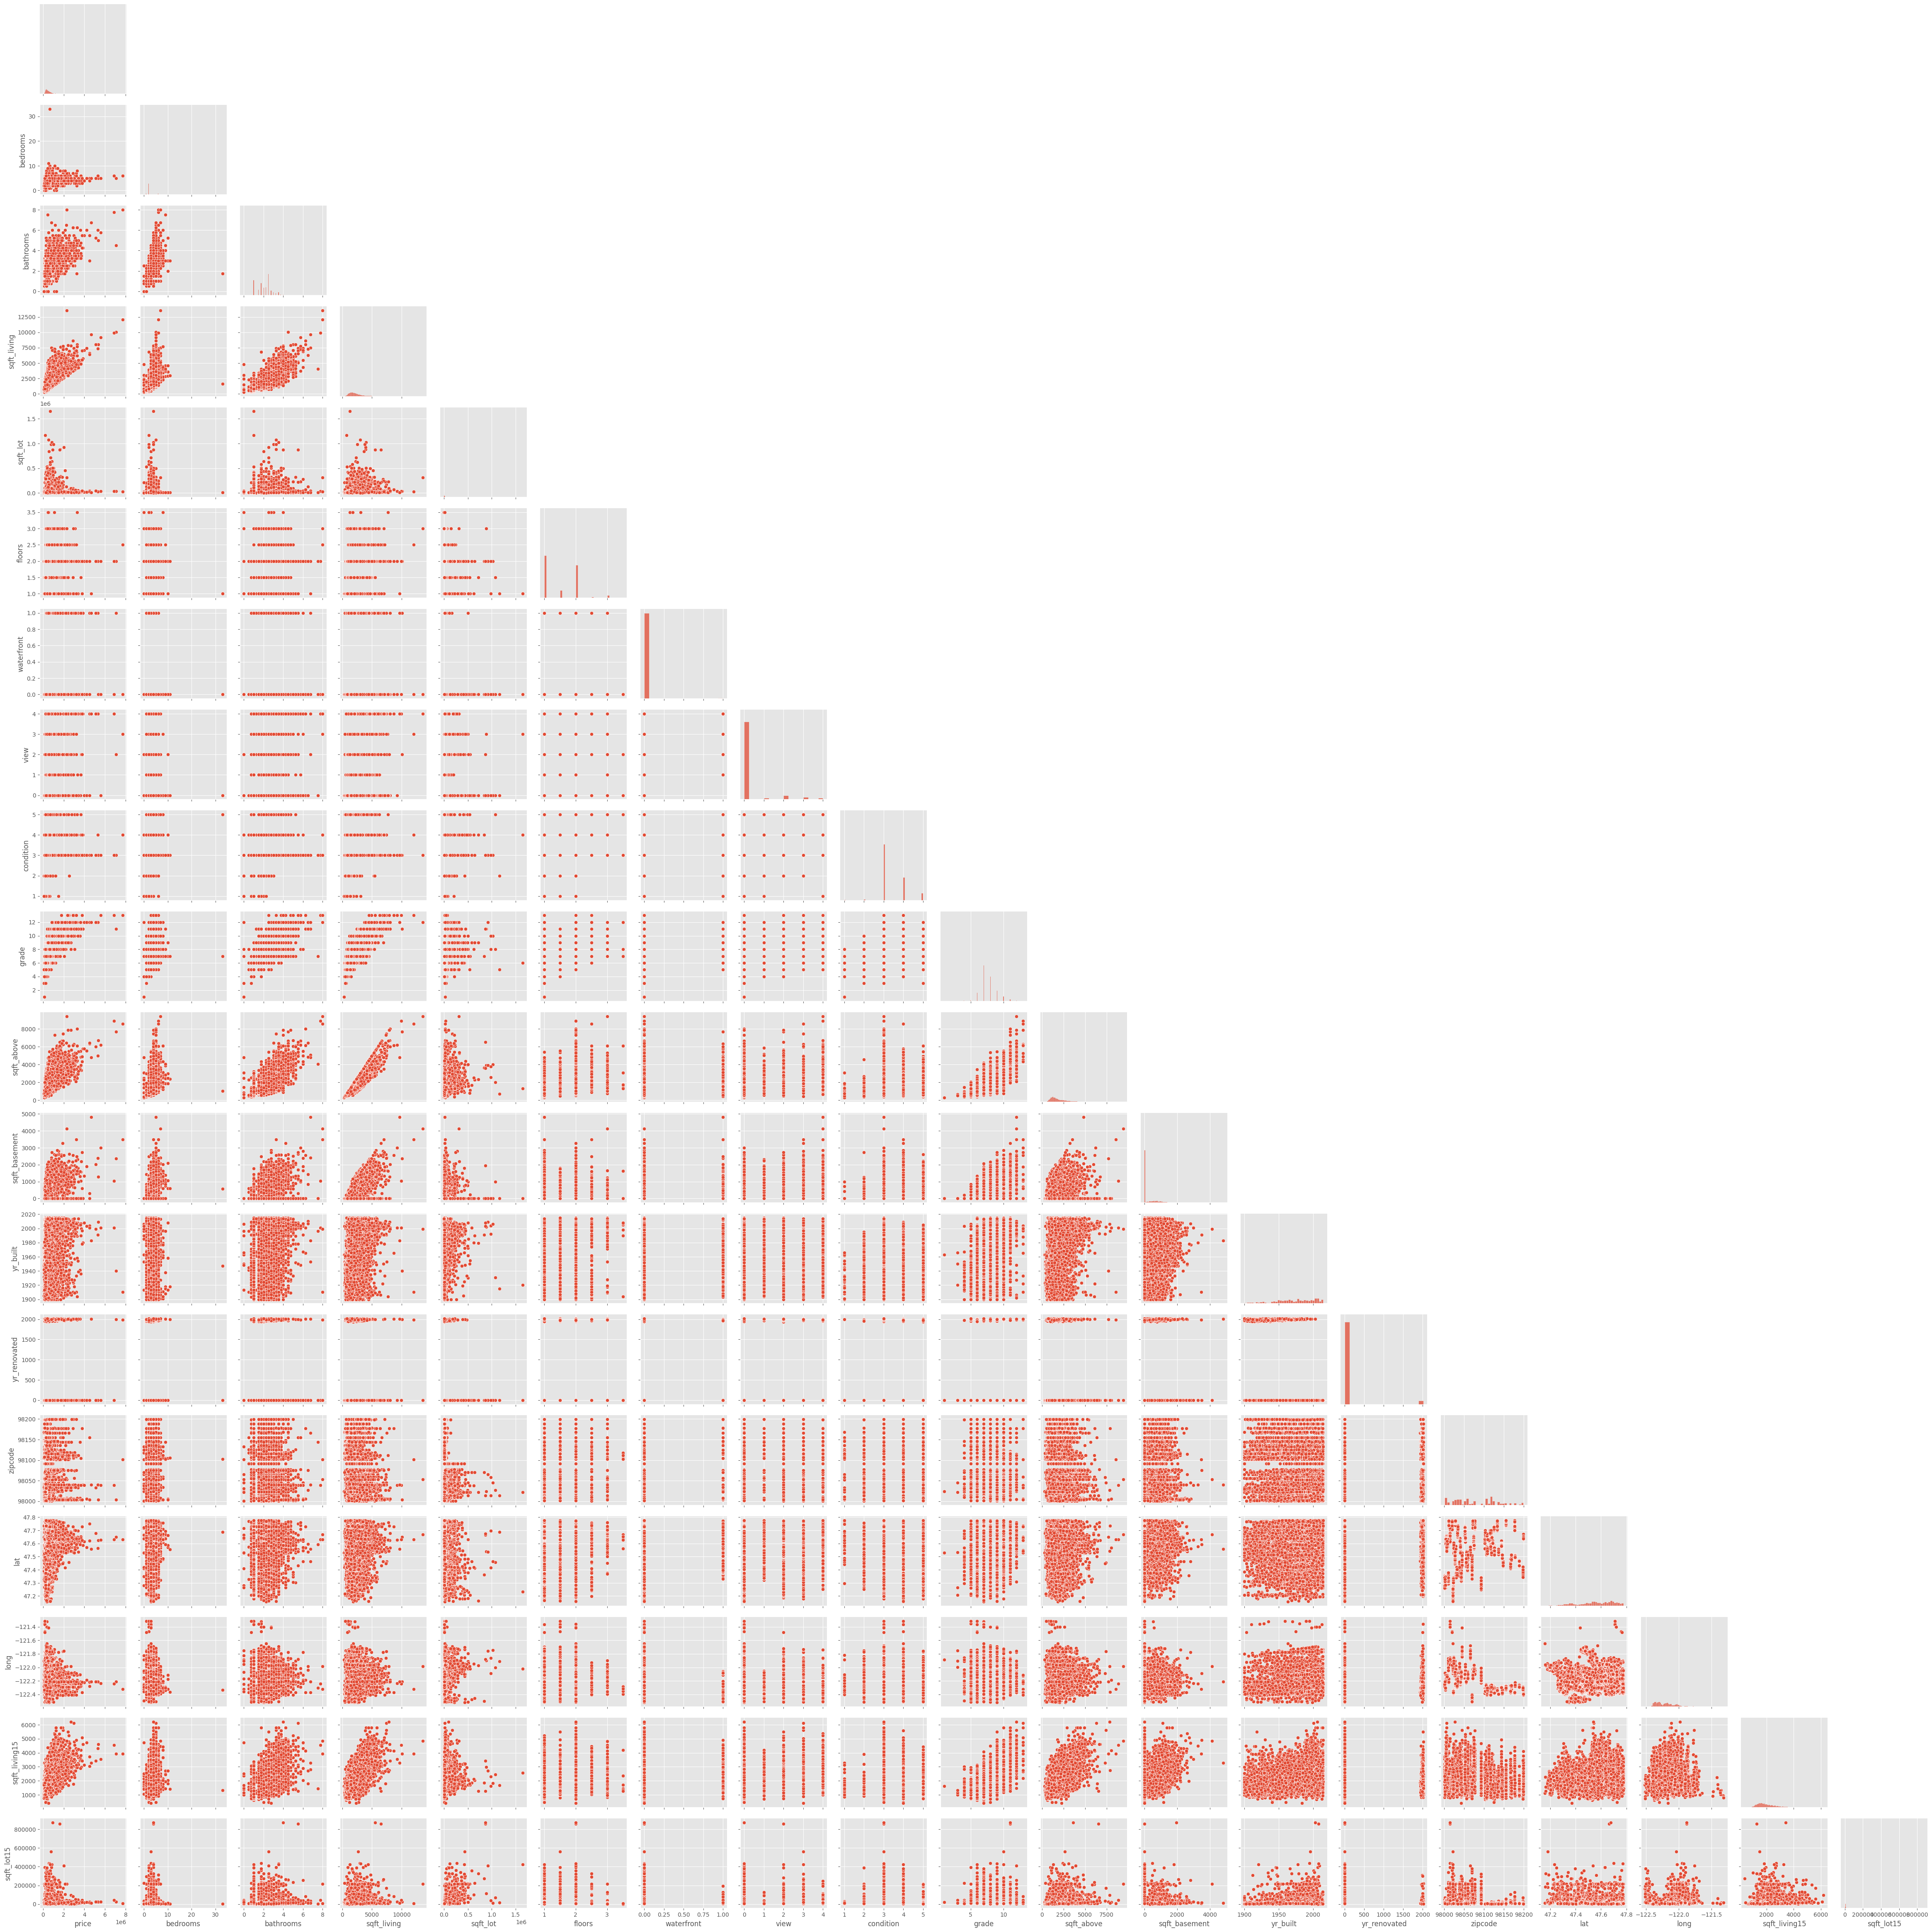

In [6]:
%matplotlib inline
plt.style.use('ggplot')
sns.pairplot(df, diag_kind = 'hist', corner = True)

In [7]:
# from info and above figure
numeric_columns = ['sqft_lot','sqft_lot15','sqft_living','sqft_living15','sqft_above','sqft_basement','lat','long','yr_built','yr_renovated']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

In [8]:
df.drop("date", axis=1, inplace=True)

### EDA

Visualizing the distribution of numerical variables.

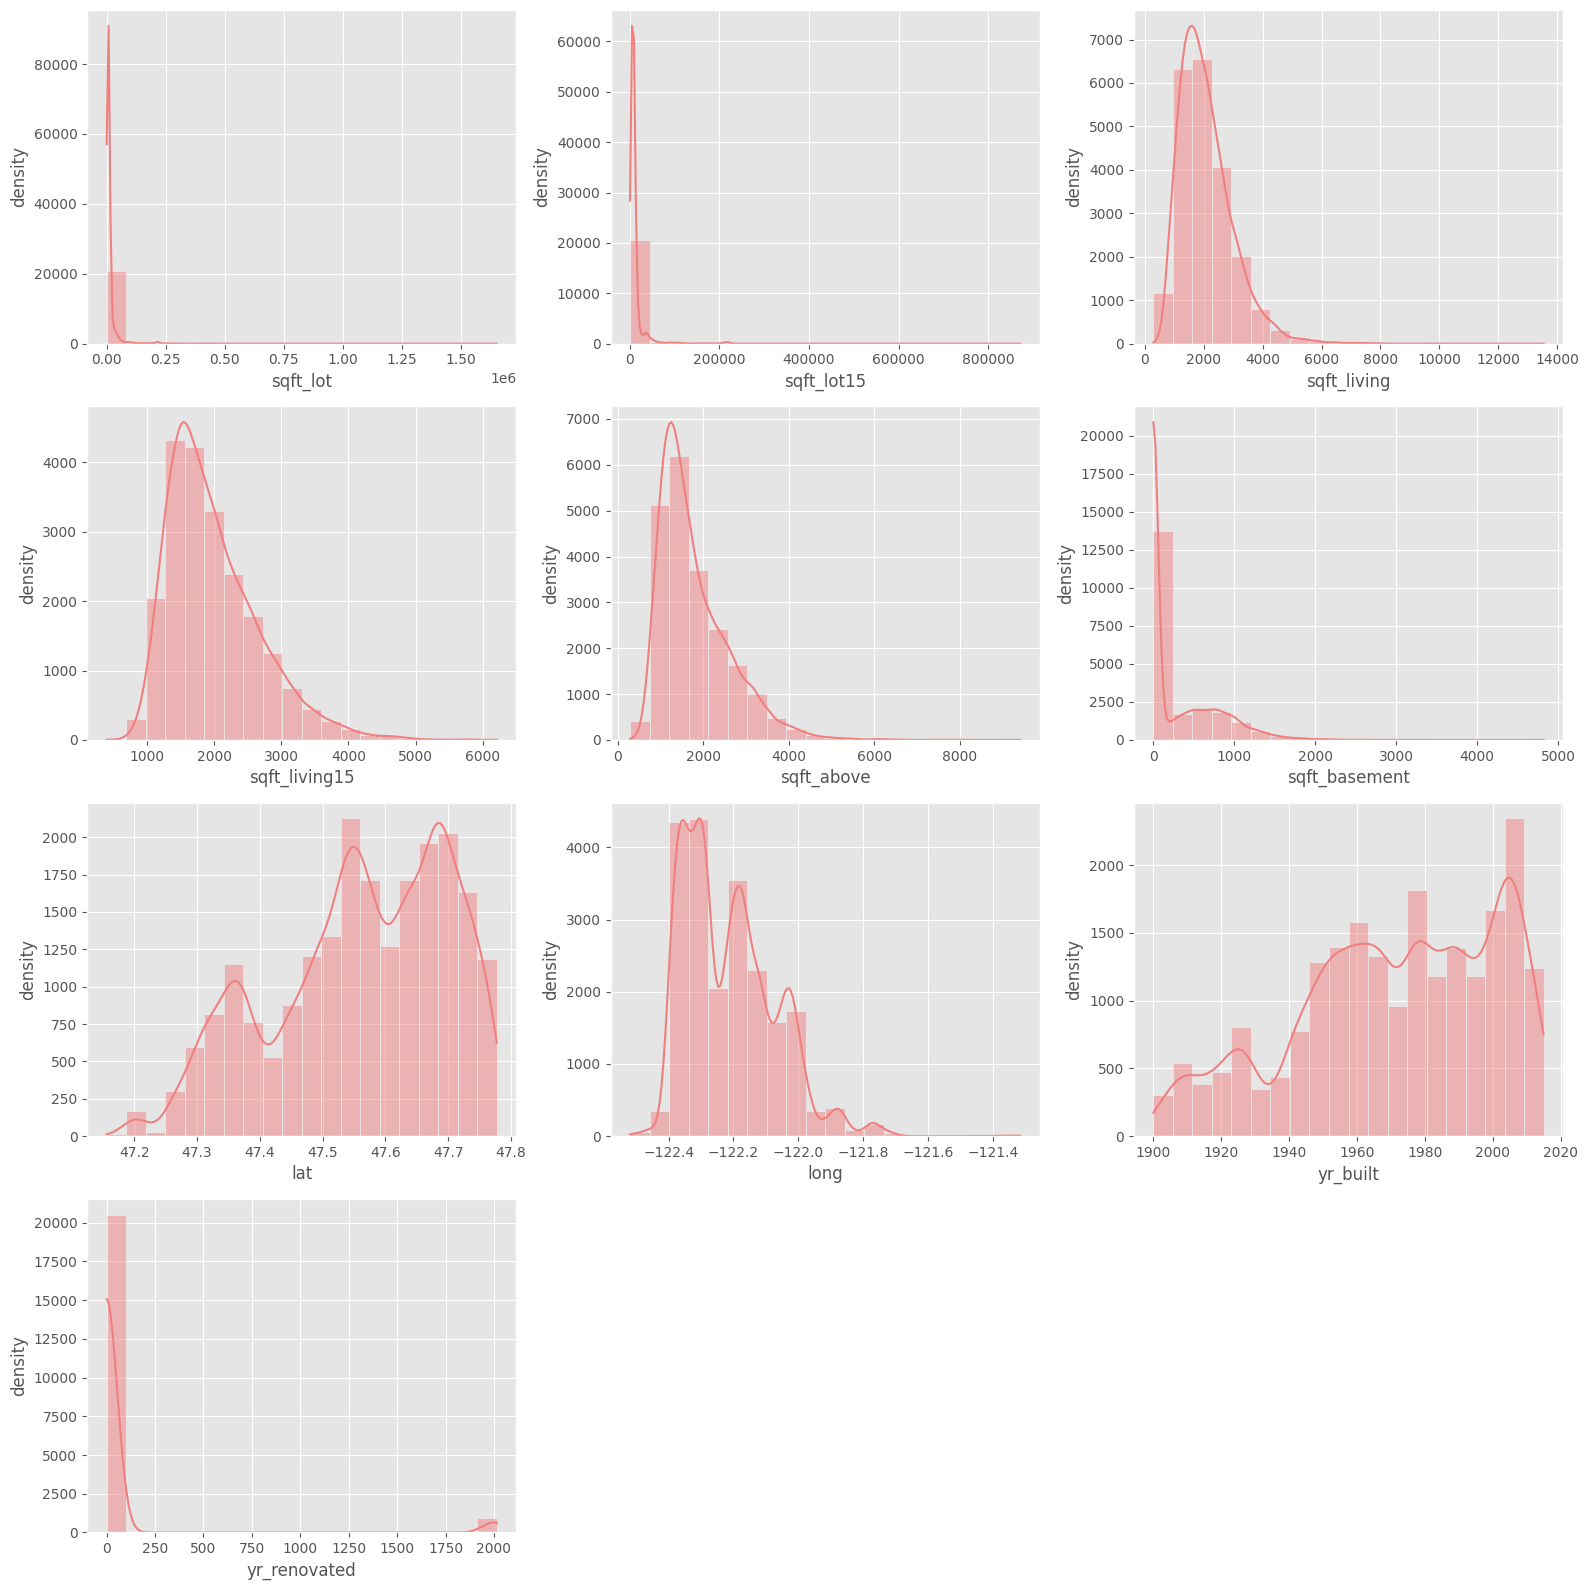

In [9]:
numerical_df = df[numeric_columns]

plt.figure(figsize=(16, 16))
for feature in numerical_df.columns.to_list():
    plt.subplot(4, 3, numerical_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=numerical_df[feature], bins=20, kde=True, color="lightcoral")
    plt.ylabel("density")
plt.tight_layout()
plt.show()

#### Co-relation of price with feature variables

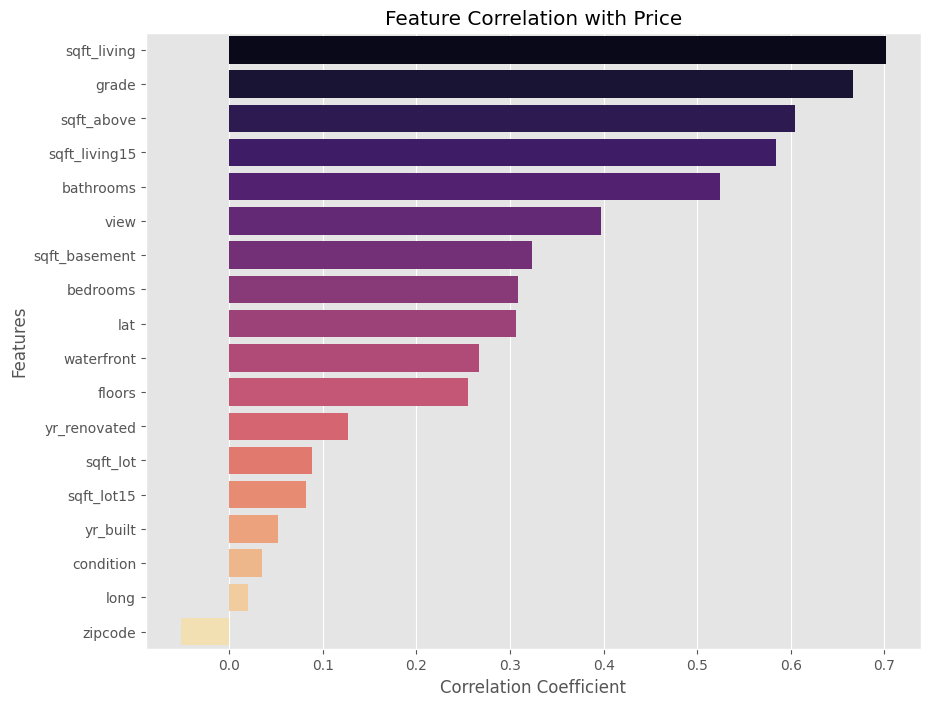

In [10]:
correlation_matrix = df.corr()

# Extracting the correlations of each feature with the target variable
target_correlations = correlation_matrix['price'].drop('price')  # Drop self-correlation
target_correlations = target_correlations.sort_values(ascending=False)  # Sort in descending order

# Creating the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlations.values, y=target_correlations.index, hue=target_correlations.index ,palette="magma")
plt.title('Feature Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#### Exploring numerical variables

Lets anaylze some of the most co-related numerical variables with the target variable `price`

In [11]:
def hist_and_regression(data, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    sns.histplot(data=data, x=x, kde=True, ax=axes[0], color='coral').set(xlabel=x, ylabel="density")
    
    sns.regplot(data=data, x=x, y=y, ax=axes[1], color='teal', 
                scatter_kws={'edgecolor': 'white'}, line_kws={"color": "coral"}).set(xlabel=f'Relation between {x} and {y}')

    corr_coeff = data[[x, y]].corr().iloc[0, 1]

    axes[0].set_title(f"Co-relation between {x} and {y} : {round(corr_coeff,2)}")

    plt.show()

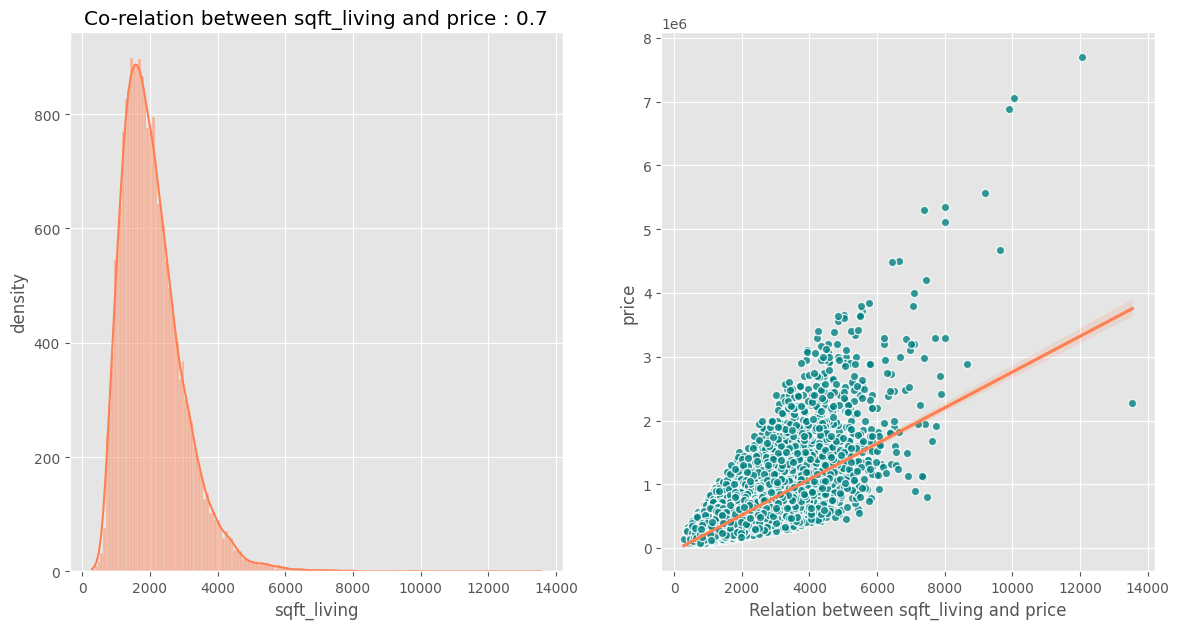

In [12]:
hist_and_regression(df,'sqft_living','price')

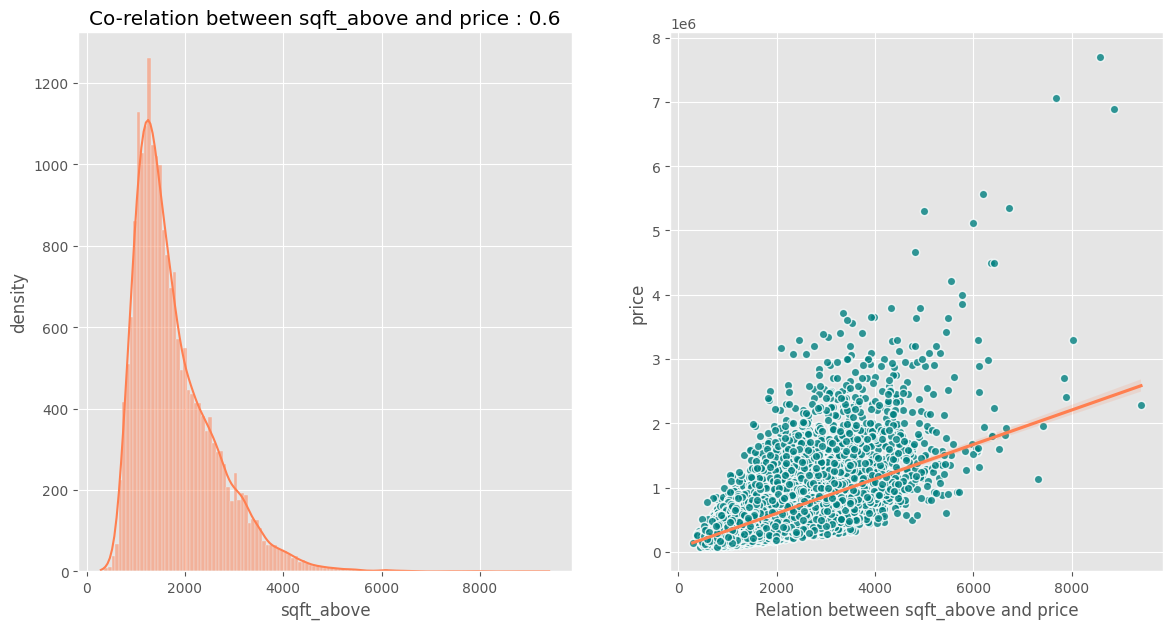

In [13]:
hist_and_regression(df,'sqft_above','price')

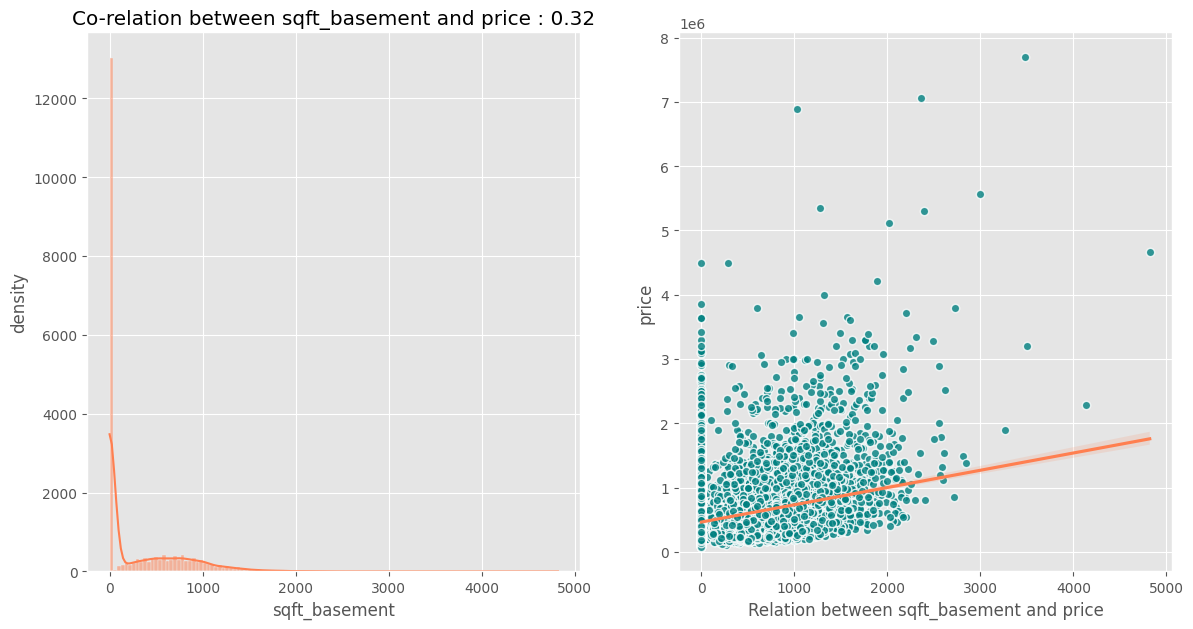

In [14]:
hist_and_regression(df,x="sqft_basement", y="price")

#### Exploring the categorical varibales.

In [15]:
import matplotlib.pyplot as plt

def pie_categorical(dataset : pd.DataFrame, columnName : str):
    """Plot pie chart for given categorical data.

    Args:
        dataset (pd.DataFrame): The categorical dataframe.
        columnName (str): name of the specefic column.
    """
    values = dataset[columnName].value_counts()

    plt.figure(figsize=[10, 8])
    patches, texts, autotexts = plt.pie(values, labels=values.index, autopct='%1.2f%%', shadow=True, pctdistance=.5, explode=[0.07]*len(values))
    plt.title(f"Pie chart of categorical variable: {columnName}", fontsize=15)
    
    # Add legend
    plt.legend(patches, values.index, loc="best")
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [16]:
# Get the categorical dataframe only
categorical_dataframe = df[categorical_columns]

Analyzing the bedroom variable.

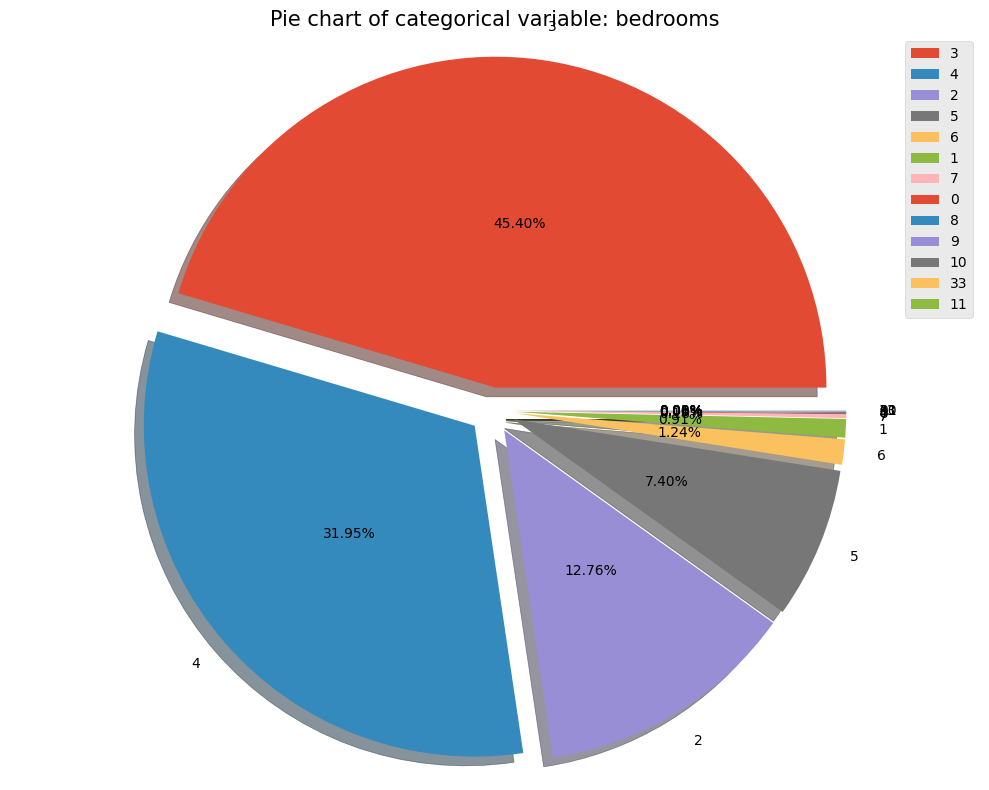

In [17]:
pie_categorical(categorical_dataframe, "bedrooms")

Findings: 
Here, we can see there are some outliers in the data. We have houses with `0` bedrooms and `33` bedrooms. We need to remove these outliers.


In [18]:
# get the index of bedrrom with 33 rooms
idx = df[df['bedrooms']==33].index 

# drop the row
df.drop(index=idx,inplace=True)


# get the index of bedrrom with 0 rooms
idx = df[df['bedrooms']==0].index 

# drop the row
df.drop(index=idx,inplace=True)

Analyzing the bathrooms.


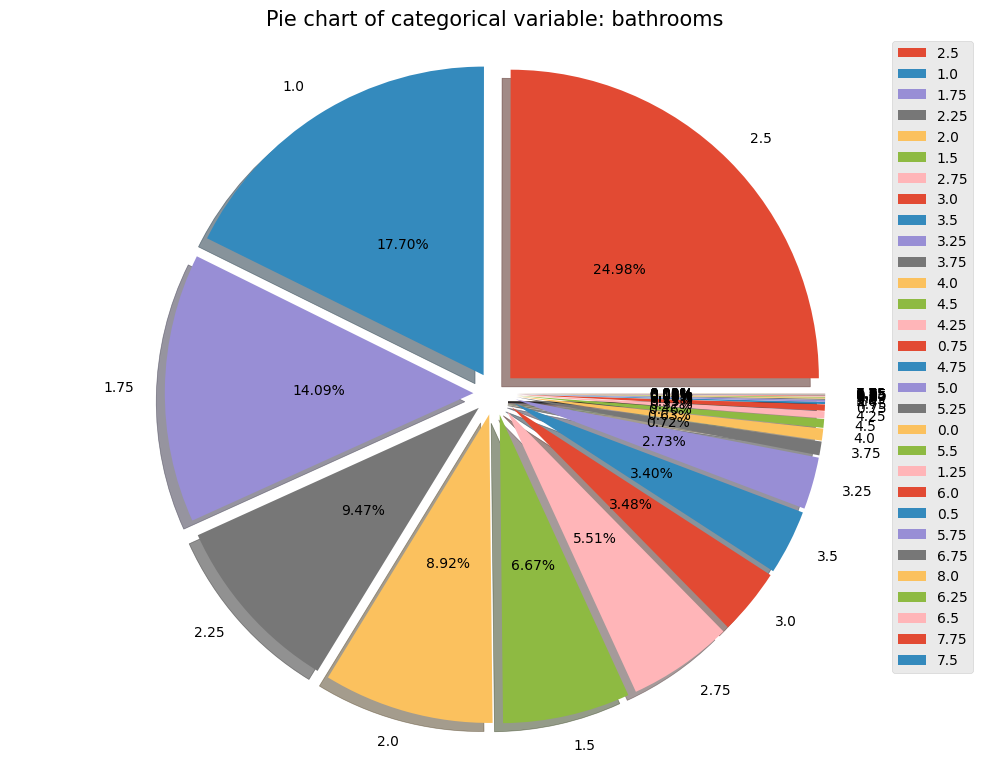

In [19]:
pie_categorical(categorical_dataframe, "bathrooms")

**Findings:💡**

Here, we can also see that there are some houses with `0` bathrooms. We need to remove houses with `0` bathrooms.

In [20]:
# get the index of bedrrom with 0 rooms
idx = df[df['bathrooms']==0].index 

# drop the row
df.drop(index=idx,inplace=True)

Exploring the waterfront.

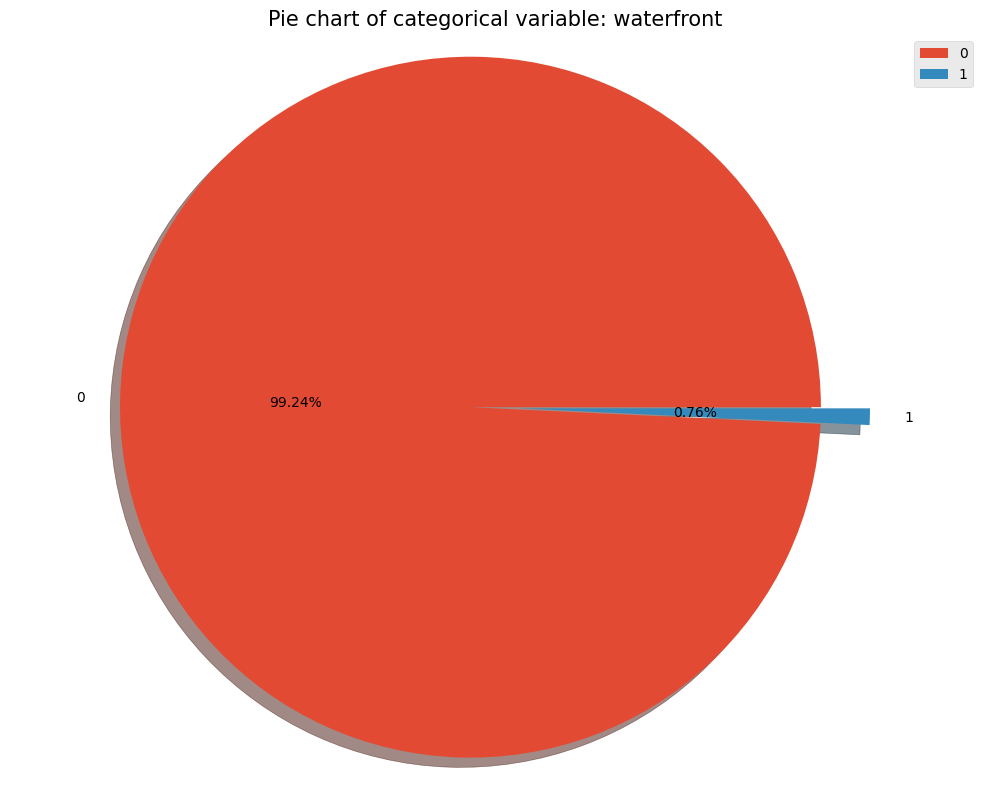

In [21]:
pie_categorical(categorical_dataframe,"waterfront")

**Findings:💡**

Here we can see that we have imbalanced classes so we can drop this entire column from the dataframe.

In [22]:
categorical_columns.remove("waterfront")

df.drop("waterfront", inplace=True, axis=1)

**Analyzing view**

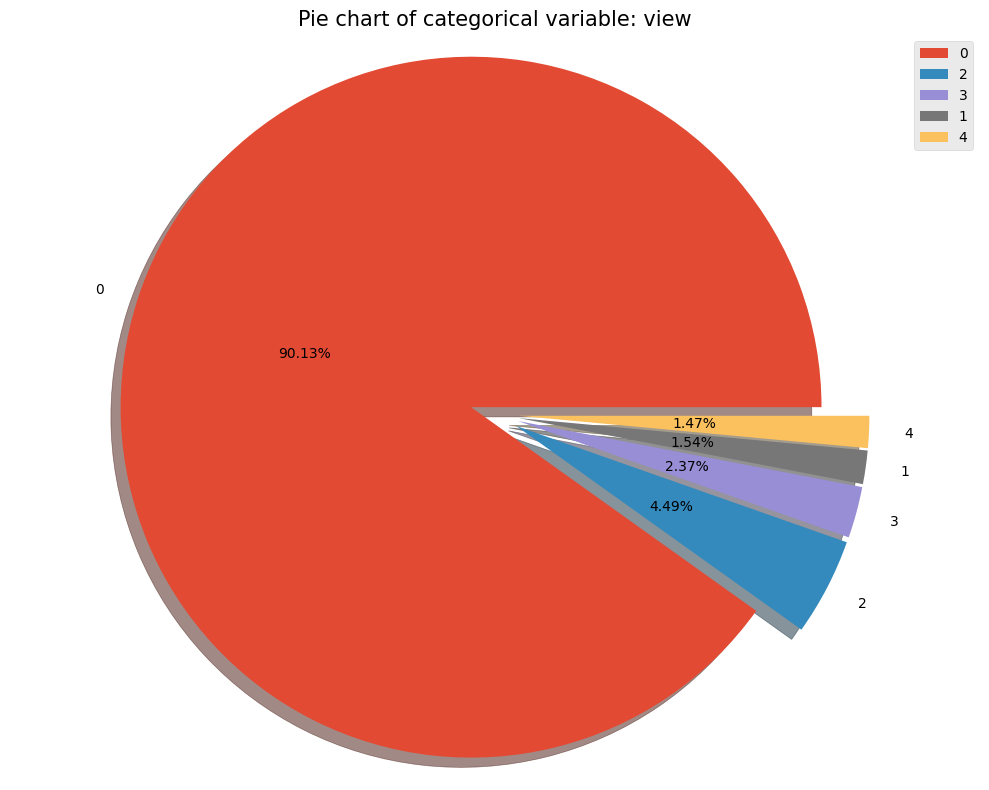

In [23]:


pie_categorical(categorical_dataframe,"view")

**Findings:💡**

Here we can see that we have imbalanced classes so we can drop this entire column from the dataframe.

In [24]:
categorical_columns.remove("view")

df.drop("view", inplace=True, axis=1)

In [25]:
similar_columns = df[["sqft_lot", "sqft_living", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15","grade","bathrooms","price"]]

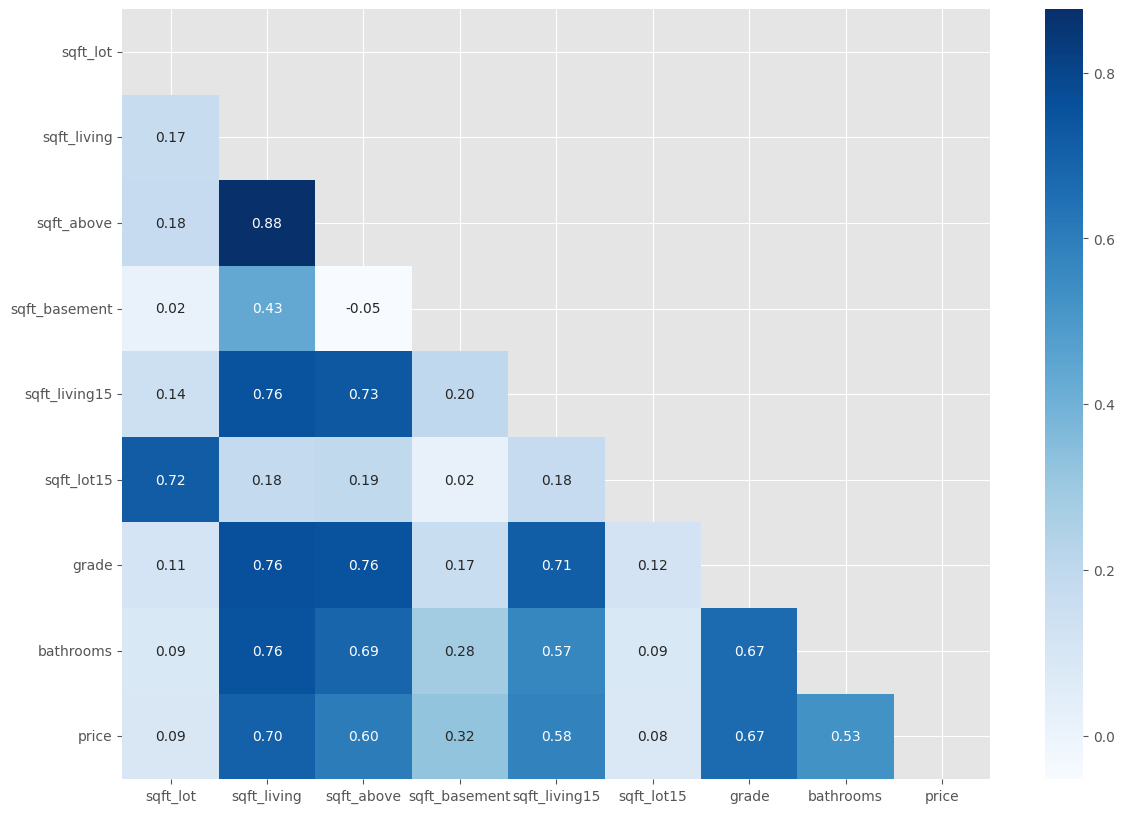

In [26]:
plt.figure(figsize=(14, 10))

corr_cm = similar_columns.corr()


sns.heatmap(similar_columns.corr(), annot=True, mask =np.triu(np.ones_like(corr_cm,dtype=bool)),  fmt=".2f", cmap='Blues')
plt.show()

**💡Findings💡**

**Looking at some of the feature relations:** 

(sqft_living, sqft_above) = 0.88 <br>
(sqft_living, grade) = 0.76<br>
(sqft_living, sqft_living15) = 0.76<br>
(sqft_living, bathrooms) = 0.76<br>

Also,
(grade, sqft_above) = 0.76<br>

Here, we can clearly see that `sqft_living` is highly co-related with all the given features. So, we can drop this feature.
Alsom we see that `grade` and `sqft_above` also do have high co-relation. We can drop `grade` and keep `sqft_above`.



In [27]:
df.drop(['sqft_living', 'grade'], axis = 1, inplace = True) # Avoiding multicollinarity

**Dealing with the dates in data**

In [28]:
# analyzing the yr_built
df["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    429
2003    420
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Here, we can see that, most of the house were build around 2014. We can convert it into a continious `age` varibale by `2014 - year_built`.

In [29]:
df['age'] = 2015 - df['yr_built']

In [30]:
# Dropping some date values as well
df.drop(["yr_built", "yr_renovated"], axis=1, inplace=True)

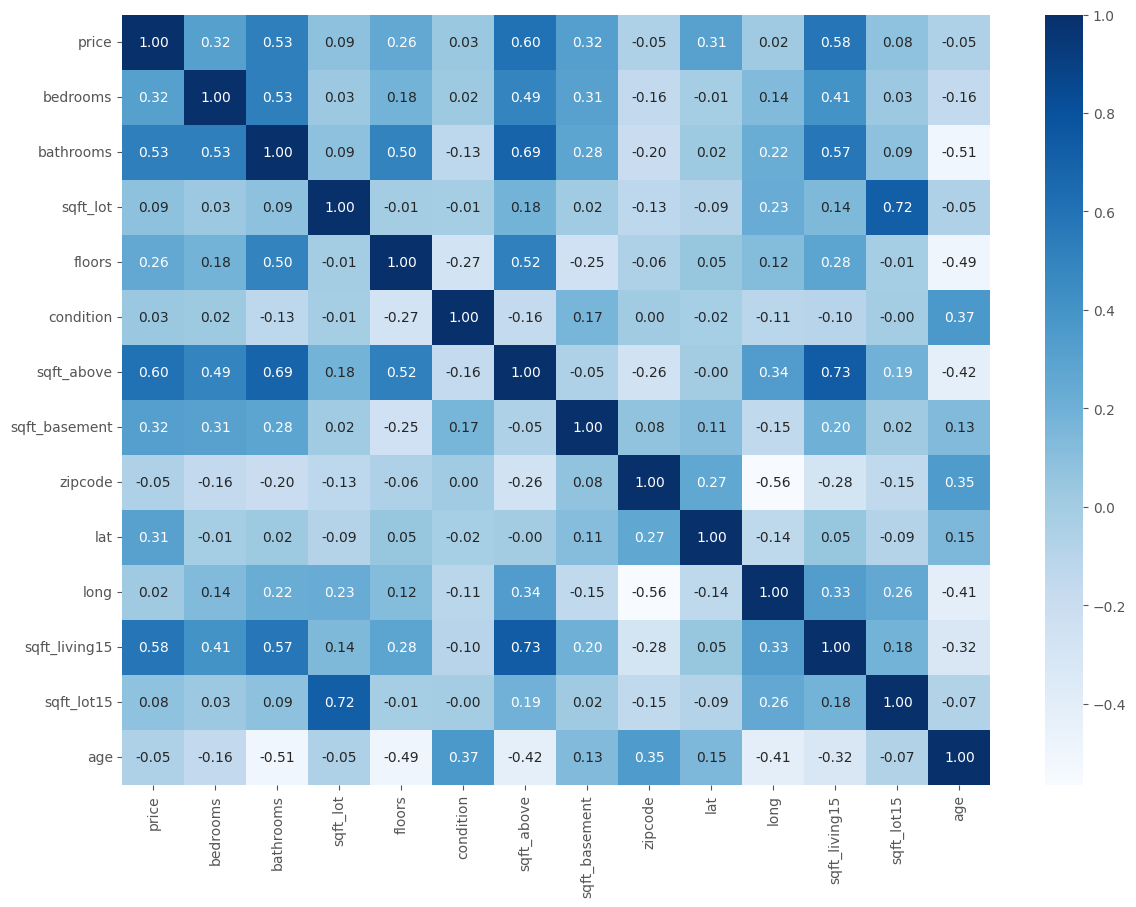

In [31]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.show()

**Analyzing the location.**

Does location of the house affects it's price?

<Axes: xlabel='long', ylabel='lat'>

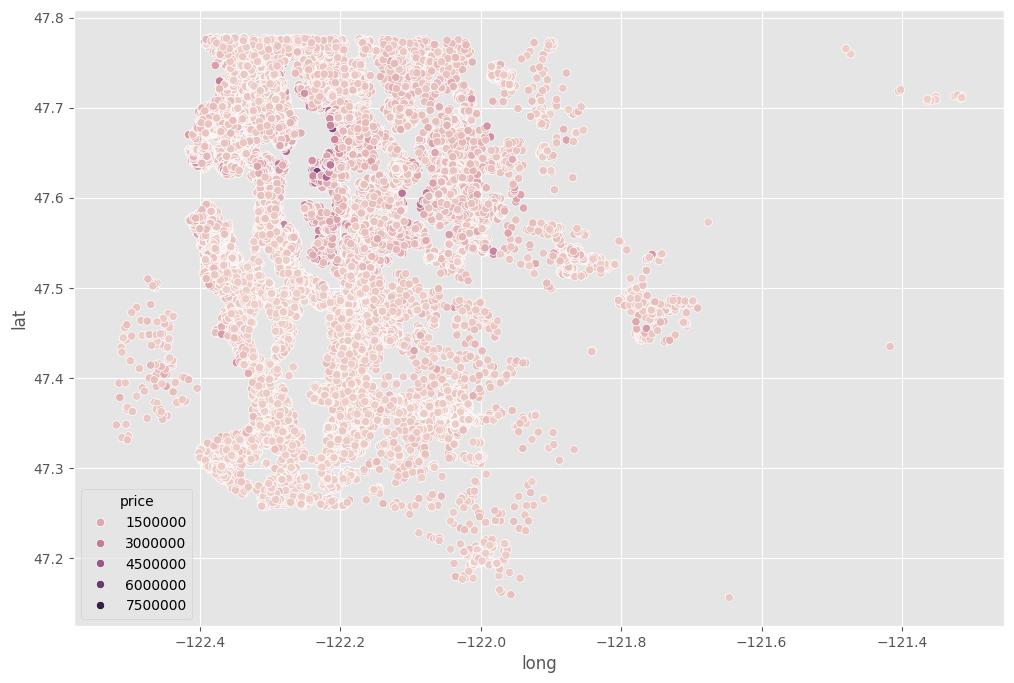

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

If we look at top `500` of the expensive house.

<Axes: xlabel='long', ylabel='lat'>

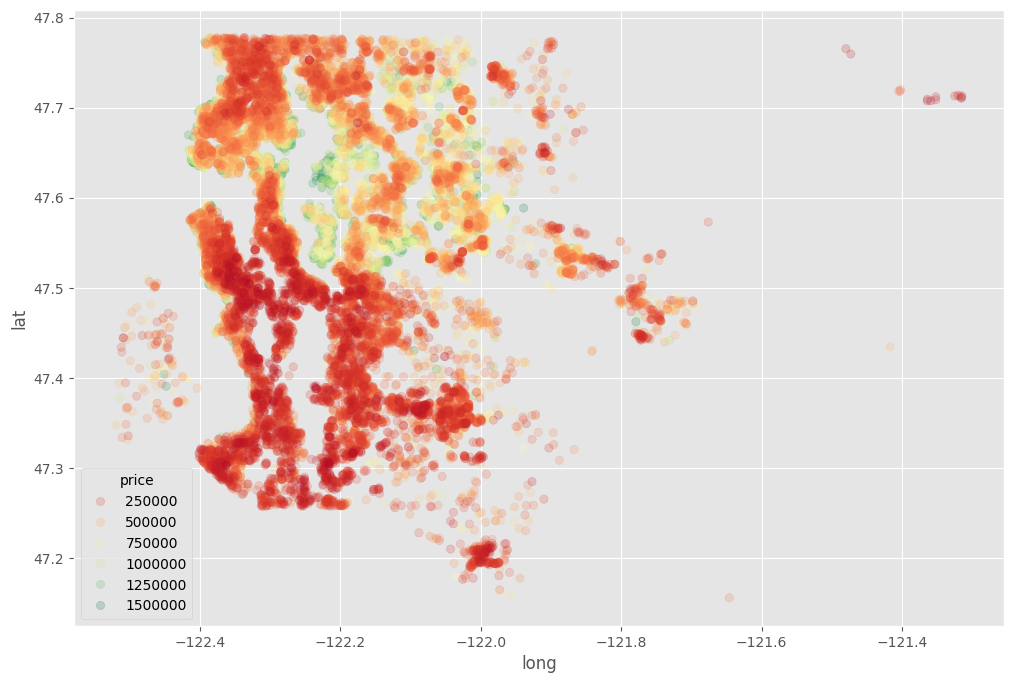

In [33]:
top_500 = df.sort_values('price',ascending=False).iloc[500:]

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=top_500,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

This makes clear that price of the house is also affected by location. So, we cannot drop the longitude and latitude.

### Preparing data for training

In [34]:
#code adopted from https://github.com/calbal91/project-king-county-housing/blob/master/Analysis.ipynb

# Seattle, Shoreline, Lake Forest Park
Azips = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
Bzips = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
Czips = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
Dzips = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
Ezips = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
Fzips = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
Gzips = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
Hzips = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
Izips = [98065, 98045, 98024]

def zipcode(x):
    
    '''Parameters:
           x (int): The property's zip code.
       Returns:
           zipcode group (str): The property's area group (a letter from A to I)
           Will return X if zip code not recognised.'''
    
    if x in Azips:
        return 'A'
    elif x in Bzips:
        return 'B'
    elif x in Czips:
        return 'C'
    elif x in Dzips:
        return 'D'
    elif x in Ezips:
        return 'E'
    elif x in Fzips:
        return 'F'
    elif x in Gzips:
        return 'G'
    elif x in Hzips:
        return 'H'
    elif x in Izips:
        return 'I'
    else:
        return 'X'
    


df['zipcat'] = df['zipcode'].map(zipcode)

zip_dummies = pd.get_dummies(df["zipcat"], prefix="zip")


In [35]:
condition_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first = True)


In [36]:
df.drop(["condition", "zipcode", "zipcat"], axis=1, inplace=True)

In [37]:
final_df = pd.concat([df, condition_dummies, zip_dummies],  axis = 1)

In [38]:
target = 'price'
X = final_df.drop(columns=[target])
y = final_df[target]

### Modelling

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    
from sklearn.metrics import mean_absolute_error , r2_score ,mean_squared_error

from sklearn.model_selection import cross_val_score

In [40]:

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.25 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16064, 24)
y_train shape: (16064,)
X_test shape: (5355, 24)
y_test shape: (5355,)


In [41]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)


# r2_score
r2=r2_score(y_test , y_pred)
print("R2 score for the given dataset is: ", round(r2, 4))


cv=cross_val_score(model, X, y,cv=5) 
print("Mean cross validation score for given dataset is: ",cv.mean())

R2 score for the given dataset is:  0.6563
Mean cross validation score for given dataset is:  0.6488230760066385


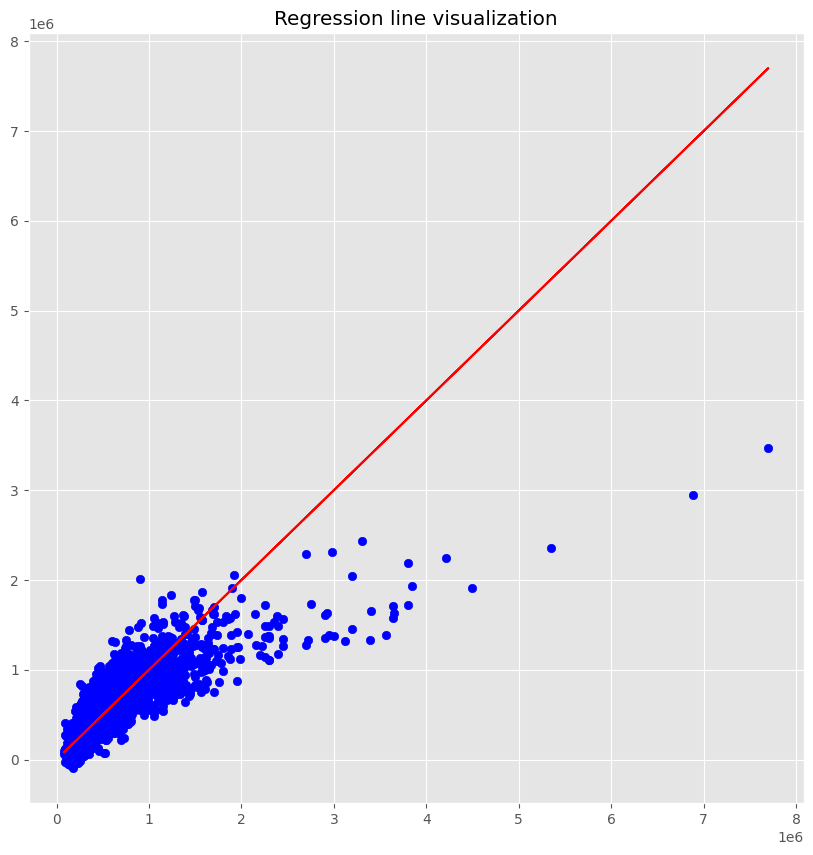

In [44]:
# liner regresion graph 
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("Regression line visualization");